In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
df = pd.read_csv("한국자산관리공사_국유부동산 매각현황_20231231.csv", encoding='cp949')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161751 entries, 0 to 161750
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   연도구분        161751 non-null  int64 
 1   지역구분        161751 non-null  object
 2   소재지명        161751 non-null  object
 3   재산구분        161751 non-null  object
 4   공부지목        161750 non-null  object
 5   대장면적(제곱미터)  161751 non-null  int64 
 6   대장금액(원)     161751 non-null  int64 
 7   처분구분명       161751 non-null  object
 8   계약일자        161751 non-null  object
 9   부서          161751 non-null  object
 10  팀           161200 non-null  object
dtypes: int64(3), object(8)
memory usage: 13.6+ MB


In [3]:
df.groupby('공부지목')['대장금액(원)'].sum()

공부지목
공원        113247089098
공장용지      266227792822
과수원        42193133554
광천지          110593000
구거        406737712634
답         606830698048
대        3871894826387
도로        776485571243
목장용지       25876375789
묘지         29529167022
사적지         7218491060
수도용지       30305875976
양어장         5995954286
염전          8694013564
유원지         4753789311
유지         51463597943
임야        711265993547
잡종지       881915371417
전         839304831248
제방         19487123125
종교용지       12332976928
주유소용지       8358569160
주차장        11133343212
창고용지        7844376570
철도용지      174806821308
체육용지      400517265827
하천        258613913639
학교용지       72990679078
확인불가      239097741074
Name: 대장금액(원), dtype: int64

# 1번 분석자료(각 팀별 매각 총액)
* 2,541,111,658,528원 차이(2조 5천억 이상)
* 국유재산1~3팀은 여러 지역 국유재산 관리업무 담당

In [4]:
team_money = df.groupby('팀')['대장금액(원)'].sum().sort_values(ascending=False)
team_money

팀
국유재산3팀      2581516333347
국유재산1팀      1701801544137
국유재산2팀      1546912579223
국유재산관리3팀     730811600300
국유재산관리2팀     574550279978
국유재산관리1팀     457615790128
국유재산관리4팀     329561988807
평택지사         277207953263
내포지사         256213498531
울산지사         192396524695
의정부지사        168842236974
국유재산관리5팀     148926424447
국유1팀         120259779246
포항지사         112422490970
국유진주지사        79780664388
국유제주지사        61555270749
충주지사          58755151926
춘천지사          58463029560
원주지사          56306997493
군산지사          51305604327
국유목포지사        50971382143
안동지사          48966794882
국유통영지사        47601636806
국유2팀          46086195813
국유세종팀         45681898305
국유여수지사        40404674819
Name: 대장금액(원), dtype: int64

매각 총액 기반 팀별 매각액 그래프(총액 많은 순)

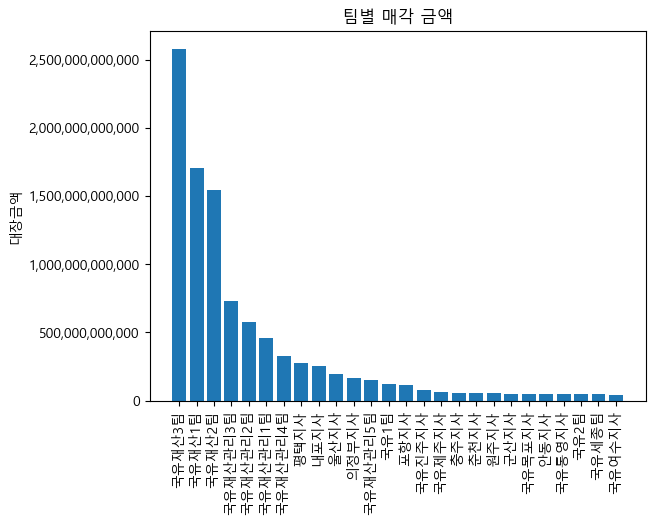

In [5]:
plt.rc('font', family='Malgun Gothic')  # 윈도우를 사용하고 있을 떄
# 마이너스 기호 문제 해결하기|
mpl.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.bar(team_money.index, team_money)
ax.set_ylabel('대장금액')
ax.set_title('팀별 매각 금액')
plt.xticks(rotation=90)
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)


# 2. 연도별 매각금액 추이
* 2016~2020전까지는 낮은 추세다가 2020부터 급증
* 다시 줄어드는 추세, 2021년에 정부에서 진행한 국유재산 재평가가 영향을 미쳤을 것으로 예상

C:\Users\BIG03-01\AppData\Local\Temp\ipykernel_12544\3385633123.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data = df, x='연도구분', y='대장금액(원)', marker='o', palette='viridis')


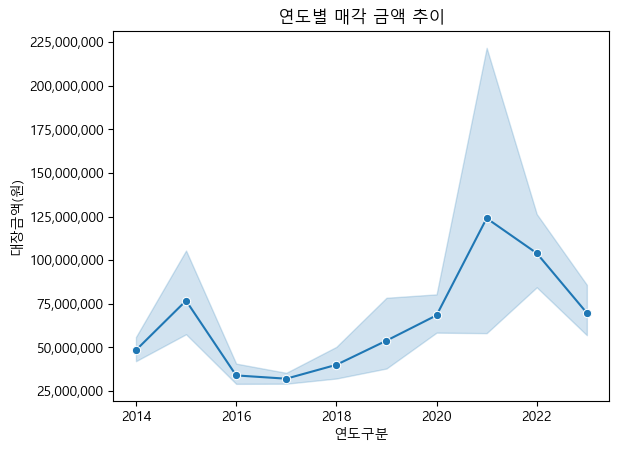

In [6]:
# 필수 분석 2
plt.title('연도별 매각 금액 추이')
# sns.barplot(data=df, x='연도구분', y='대장금액(원)')
sns.lineplot(data = df, x='연도구분', y='대장금액(원)', marker='o', palette='viridis')
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
# plt.xticks(rotation=90)

# 3. 상위 5개 지역별 매각 면적 확인하기
* 2023년 데이터에 강원도와 전라북도가 특별자치도로 명칭이 변경되어 편의상 기존 명칭으로 통일
* 

In [7]:
total = []
region = df.sort_values('지역구분')
region

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부서,팀
136034,2022,강원도,강원도 고성군 토성면 원암리 437-2,토지,대,72,451440,처분(매각수의),2022-01-05,강원지역본부,국유2팀
83333,2018,강원도,강원도 강릉시 옥계면 천남리 361-16,토지,전,183,4556700,처분(매각수의),2018-05-02,강원지역본부,국유1팀
83332,2018,강원도,강원도 강릉시 옥계면 천남리 361-15,토지,대,105,2614500,처분(매각수의),2018-05-02,강원지역본부,국유1팀
83331,2018,강원도,강원도 강릉시 옥계면 천남리 361-14,토지,전,24,597600,처분(매각수의),2018-05-02,강원지역본부,국유1팀
83330,2018,강원도,강원도 강릉시 옥계면 현내리 414-11,토지,대,169,9768200,처분(매각수의),2018-01-29,강원지역본부,국유1팀
...,...,...,...,...,...,...,...,...,...,...,...
66156,2017,충청북도,충청북도 괴산군 청천면 이평리 366-24,토지,대,125,346250,처분(매각수의),2017-09-04,충북지역본부,충주지사
66157,2017,충청북도,충청북도 괴산군 청안면 읍내리 596-19,토지,도로,39,713700,처분(매각수의),2017-12-29,충북지역본부,충주지사
66158,2017,충청북도,충청북도 괴산군 청안면 읍내리 596-20,토지,도로,19,347700,처분(매각수의),2017-12-29,충북지역본부,충주지사
66146,2017,충청북도,충청북도 괴산군 청천면 덕평리 326-2,토지,답,1975,26070000,처분(매각수의),2017-10-13,충북지역본부,충주지사


In [8]:
region.duplicated(subset=['지역구분'])
temp = region.drop_duplicates(subset=['지역구분'], keep='first')
temp

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부서,팀
136034,2022,강원도,강원도 고성군 토성면 원암리 437-2,토지,대,72,451440,처분(매각수의),2022-01-05,강원지역본부,국유2팀
159425,2023,강원특별자치도,강원특별자치도 홍천군 홍천읍 희망리 203-3,토지,임야,1286,12268440,처분(매각수의),2023-01-13,강원지역본부,원주지사
134467,2022,경기도,경기도 화성시 안녕동 42-32,토지,대,26,16791840,처분(무상귀속),2022-06-27,경기지역본부,국유재산2팀
102806,2019,경상남도,경상남도 창원시 마산합포구 구산면 구복리 248-12,토지,전,83,2216100,처분(매각수의),2019-02-11,경남지역본부,국유재산관리3팀
88051,2018,경상북도,경상북도 경주시 하동 801-1,토지,대,73,2065900,처분(매각수의),2018-03-15,대구경북지역본부,포항지사
144917,2023,광주광역시,광주광역시 광산구 운수동 334-1,토지,하천,6,453000,처분(매각수의),2023-04-28,광주전남지역본부,국유재산관리4팀
57546,2017,대구광역시,대구광역시 수성구 범물동 1229-20,토지,대,53,15049880,처분(매각수의),2017-08-31,대구경북지역본부,국유재산관리3팀
119902,2021,대전광역시,대전광역시 동구 가오동 374-92,토지,대,23,18556400,처분(매각입찰),2021-02-18,대전충남지역본부,국유재산관리3팀
18740,2015,부산광역시,부산광역시 동구 범일동 1309-64,토지,도로,2,1438000,처분(매각수의),2015-02-13,부산지역본부,국유재산관리5팀
142307,2023,서울특별시,서울특별시 용산구 보광동 265-886,토지,대,10,72960000,처분(매각수의),2023-01-27,서울서부지역본부,국유재산3팀


In [9]:
region_2 = region.replace('강원특별자치도', '강원도')
region_2 = region_2.replace('전북특별자치도', '전라북도')
region_2

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부서,팀
136034,2022,강원도,강원도 고성군 토성면 원암리 437-2,토지,대,72,451440,처분(매각수의),2022-01-05,강원지역본부,국유2팀
83333,2018,강원도,강원도 강릉시 옥계면 천남리 361-16,토지,전,183,4556700,처분(매각수의),2018-05-02,강원지역본부,국유1팀
83332,2018,강원도,강원도 강릉시 옥계면 천남리 361-15,토지,대,105,2614500,처분(매각수의),2018-05-02,강원지역본부,국유1팀
83331,2018,강원도,강원도 강릉시 옥계면 천남리 361-14,토지,전,24,597600,처분(매각수의),2018-05-02,강원지역본부,국유1팀
83330,2018,강원도,강원도 강릉시 옥계면 현내리 414-11,토지,대,169,9768200,처분(매각수의),2018-01-29,강원지역본부,국유1팀
...,...,...,...,...,...,...,...,...,...,...,...
66156,2017,충청북도,충청북도 괴산군 청천면 이평리 366-24,토지,대,125,346250,처분(매각수의),2017-09-04,충북지역본부,충주지사
66157,2017,충청북도,충청북도 괴산군 청안면 읍내리 596-19,토지,도로,39,713700,처분(매각수의),2017-12-29,충북지역본부,충주지사
66158,2017,충청북도,충청북도 괴산군 청안면 읍내리 596-20,토지,도로,19,347700,처분(매각수의),2017-12-29,충북지역본부,충주지사
66146,2017,충청북도,충청북도 괴산군 청천면 덕평리 326-2,토지,답,1975,26070000,처분(매각수의),2017-10-13,충북지역본부,충주지사


In [10]:
temp2 = region_2.drop_duplicates(subset=['지역구분'], keep='first')
temp2

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부서,팀
136034,2022,강원도,강원도 고성군 토성면 원암리 437-2,토지,대,72,451440,처분(매각수의),2022-01-05,강원지역본부,국유2팀
134467,2022,경기도,경기도 화성시 안녕동 42-32,토지,대,26,16791840,처분(무상귀속),2022-06-27,경기지역본부,국유재산2팀
102806,2019,경상남도,경상남도 창원시 마산합포구 구산면 구복리 248-12,토지,전,83,2216100,처분(매각수의),2019-02-11,경남지역본부,국유재산관리3팀
88051,2018,경상북도,경상북도 경주시 하동 801-1,토지,대,73,2065900,처분(매각수의),2018-03-15,대구경북지역본부,포항지사
144917,2023,광주광역시,광주광역시 광산구 운수동 334-1,토지,하천,6,453000,처분(매각수의),2023-04-28,광주전남지역본부,국유재산관리4팀
57546,2017,대구광역시,대구광역시 수성구 범물동 1229-20,토지,대,53,15049880,처분(매각수의),2017-08-31,대구경북지역본부,국유재산관리3팀
119902,2021,대전광역시,대전광역시 동구 가오동 374-92,토지,대,23,18556400,처분(매각입찰),2021-02-18,대전충남지역본부,국유재산관리3팀
18740,2015,부산광역시,부산광역시 동구 범일동 1309-64,토지,도로,2,1438000,처분(매각수의),2015-02-13,부산지역본부,국유재산관리5팀
142307,2023,서울특별시,서울특별시 용산구 보광동 265-886,토지,대,10,72960000,처분(매각수의),2023-01-27,서울서부지역본부,국유재산3팀
58880,2017,세종특별자치시,세종특별자치시 연서면 국촌리 332-4,토지,목장용지,160,6064000,처분(매각수의),2017-12-20,대전충남지역본부,국유재산관리3팀


In [11]:
region_arr = []
for i in temp2['지역구분']:
    region_arr.append(i)

region_arr

['강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '인천광역시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도']

# 상위 5개 지역(금액기준, 합계와 평균)
* 상위 지역 선정에 대한 기준이 없어 임의로 금액기준 상위지역 선정. 합계와 평균 모두 진행

In [12]:
top_region1 = region_2.groupby('지역구분')['대장금액(원)'].sum().sort_values(ascending=False).head(5)
# top_region1.index[1]
top_region1

지역구분
서울특별시    3328526711964
경기도      2373630000360
부산광역시     666268833336
인천광역시     598683279955
충청남도      478330967679
Name: 대장금액(원), dtype: int64

In [13]:
arr = [[], []]
for i in top_region1.index:
    arr[1].append(region_2.groupby('지역구분')['대장면적(제곱미터)'].sum()[i])
    arr[0].append(i)
arr

[['서울특별시', '경기도', '부산광역시', '인천광역시', '충청남도'],
 [3442380, 12384861, 3162417, 1929992, 8757993]]

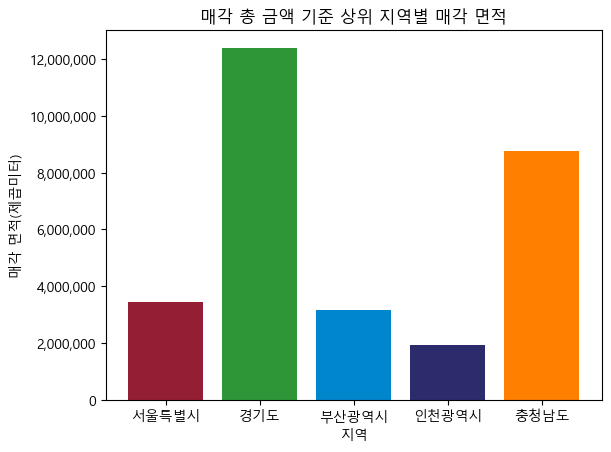

In [14]:
fig, ax = plt.subplots()

ax.bar(arr[0], arr[1], color = ['#941e34', '#2F9638', '#0086CD', '#2C2C6D', '#FF7F00'])

ax.set_xlabel('지역')
ax.set_ylabel('매각 면적(제곱미터)')
ax.set_title('매각 총 금액 기준 상위 지역별 매각 면적')
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

In [15]:
top_region2 = region_2.groupby('지역구분')['대장금액(원)'].mean().sort_values(ascending=False).head(5)
top_region2

지역구분
서울특별시    4.245028e+08
인천광역시    1.687382e+08
광주광역시    9.955631e+07
대전광역시    8.940369e+07
대구광역시    8.122842e+07
Name: 대장금액(원), dtype: float64

In [16]:
arr2 = [[], []]
for i in top_region2.index:
    arr2[1].append(region_2.groupby('지역구분')['대장면적(제곱미터)'].sum()[i])
    arr2[0].append(i)
arr2

[['서울특별시', '인천광역시', '광주광역시', '대전광역시', '대구광역시'],
 [3442380, 1929992, 1455388, 530638, 734285]]

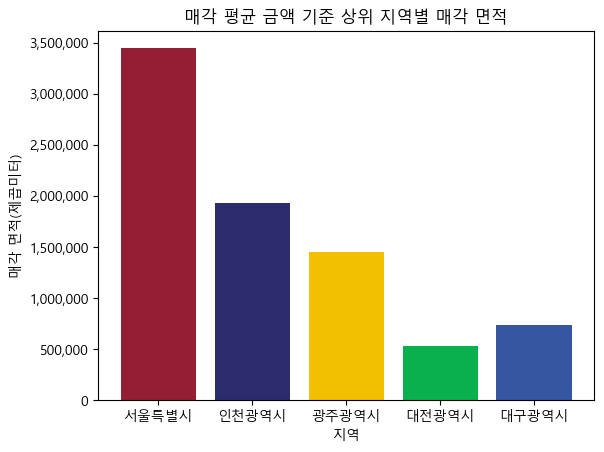

In [17]:
fig, ax = plt.subplots()

ax.bar(arr2[0], arr2[1], color = ['#941e34', '#2C2C6D', '#f2c000', '#0AB04E', '#3756A1'])

ax.set_xlabel('지역')
ax.set_ylabel('매각 면적(제곱미터)')
ax.set_title('매각 평균 금액 기준 상위 지역별 매각 면적')
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

# 계약 일자 정보 기준 매각 많은때 특징

In [18]:
# month = region_2.groupby('계약일자')['대장금액(원)']
df['계약일자'].str.split('-').str[1]
date = df
date['month'] = date['계약일자'].str.split('-').str[1]
date


,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부서,팀,month
0,2014,서울특별시,서울특별시 종로구 창성동 117-10,토지,대,4,7372000,처분(매각수의),2014-04-07,서울서부지역본부,국유재산1팀,04
1,2014,서울특별시,서울특별시 종로구 옥인동 47-255,토지,대,10,31482000,처분(매각수의),2014-11-10,서울서부지역본부,국유재산1팀,11
2,2014,서울특별시,서울특별시 종로구 사직동 1-31,토지,대,5,16836000,처분(매각수의),2014-02-27,서울서부지역본부,국유재산1팀,02
3,2014,서울특별시,서울특별시 종로구 세종로 86-2,토지,대,11,338767000,처분(무상관리전환),2014-03-03,서울서부지역본부,국유재산1팀,03
4,2014,서울특별시,서울특별시 종로구 세종로 89-2,토지,대,1,33787000,처분(무상관리전환),2014-03-03,서울서부지역본부,국유재산1팀,03
...,...,...,...,...,...,...,...,...,...,...,...,...
161746,2023,전북특별자치도,전북특별자치도 부안군 줄포면 신리 867-2,토지,구거,220,16469200,처분(매각수의),2023-08-30,전북지역본부,국유재산관리2팀,08
161747,2023,전북특별자치도,전북특별자치도 부안군 줄포면 신리 867-3,토지,구거,30,2245800,처분(매각수의),2023-08-30,전북지역본부,국유재산관리2팀,08
161748,2023,전북특별자치도,전북특별자치도 부안군 줄포면 신리 901,토지,구거,680,50904800,처분(매각수의),2023-08-30,전북지역본부,국유재산관리2팀,08
161749,2023,전북특별자치도,전북특별자치도 부안군 줄포면 파산리 620,토지,대,274,4795000,처분(매각수의),2023-11-03,전북지역본부,국유재산관리2팀,11


In [19]:
date.duplicated(subset=['처분구분명'])

temp3 = date.drop_duplicates(subset=['처분구분명'], keep='first')
temp3

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부서,팀,month
0,2014,서울특별시,서울특별시 종로구 창성동 117-10,토지,대,4,7372000,처분(매각수의),2014-04-07,서울서부지역본부,국유재산1팀,04
3,2014,서울특별시,서울특별시 종로구 세종로 86-2,토지,대,11,338767000,처분(무상관리전환),2014-03-03,서울서부지역본부,국유재산1팀,03
214,2014,서울특별시,서울특별시 용산구 청파동1가 180-8,토지,대,254,1128204000,처분(매각입찰),2014-08-13,서울서부지역본부,국유재산3팀,08
349,2014,서울특별시,서울특별시 중랑구 면목동 727-396,토지,도로,57,43776000,처분(유상관리전환),2014-01-09,서울동부지역본부,국유재산1팀,01
634,2014,서울특별시,서울특별시 동작구 사당동 708-852,토지,대,20,21200000,처분(무상양여),2014-12-12,서울서부지역본부,국유재산2팀,12
3562,2014,경기도,경기도 부천시 역곡동 387-14,토지,도로,99,10395000,처분(무상귀속),2014-08-25,인천지역본부,국유재산3팀,08
17378,2015,서울특별시,서울특별시 성동구 마장동 815-3,토지,대,58,191946900,처분(유상양여),2015-09-22,서울동부지역본부,국유재산1팀,09
22223,2015,경기도,경기도 파주시 파주읍 파주리 516-3,토지,도로,221,21503300,처분(사용승인),2015-08-20,인천지역본부,국유재산2팀,08


In [20]:
month_arr = [[], [], [], [], [], [], [], [], [], [], [], []]
name = [j for j in temp3['처분구분명']]
for i in range(12):
    for j in name:
        temp4 = date.loc[date['month']==str(i + 1).zfill(2)]
        month_arr[i].append(len(temp4.loc[temp4['처분구분명']==j]))
month_arr


[[10261, 779, 296, 37, 64, 79, 0, 92],
 [8604, 418, 305, 1, 49, 98, 0, 516],
 [12167, 279, 455, 0, 41, 110, 0, 205],
 [12287, 317, 566, 20, 78, 45, 0, 189],
 [12368, 368, 582, 7, 30, 58, 0, 510],
 [14545, 150, 996, 16, 29, 168, 0, 253],
 [11253, 395, 1128, 2, 200, 74, 0, 303],
 [10981, 290, 915, 5, 37, 134, 0, 1038],
 [10423, 223, 956, 0, 58, 83, 1, 307],
 [11792, 261, 1231, 14, 24, 113, 0, 216],
 [10789, 754, 1088, 7, 71, 82, 0, 227],
 [15774, 855, 670, 47, 126, 115, 0, 251]]

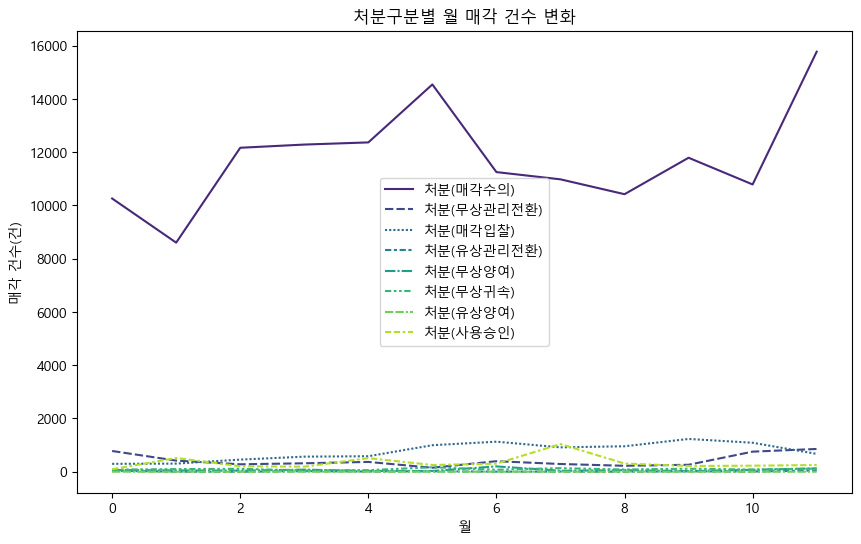

In [21]:
# 데이터프레임 생성
month_data = pd.DataFrame(month_arr, columns=name)

# 선 그래프 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(data=month_data, palette='viridis')

plt.title('처분구분별 월 매각 건수 변화')
plt.xlabel('월')
plt.ylabel('매각 건수(건)')
plt.show()


C:\Users\BIG03-01\AppData\Local\Temp\ipykernel_12544\544670345.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=temp_arr, palette='viridis')


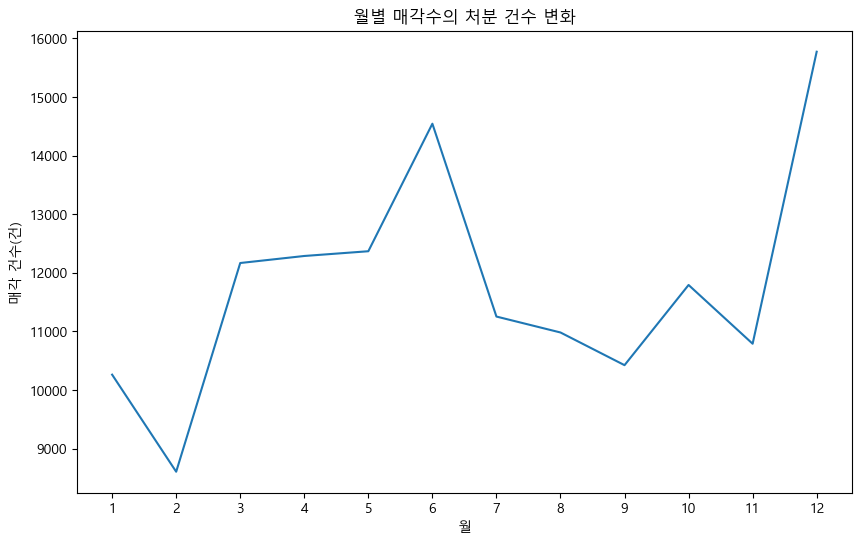

In [22]:
temp_arr = []
for i in range(12):
    temp_arr.append(month_arr[i][0])
# 선 그래프 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(data=temp_arr, palette='viridis')
plt.xticks(range(12), labels=range(1, 13))

plt.title('월별 매각수의 처분 건수 변화')
plt.xlabel('월')
plt.ylabel('매각 건수(건)')
plt.show()


In [23]:
temp_arr

[10261,
 8604,
 12167,
 12287,
 12368,
 14545,
 11253,
 10981,
 10423,
 11792,
 10789,
 15774]